In [1]:
#import 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error




%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)# to show all columns in output
pd.set_option('display.max_rows', None)# to show all rows


# Import the data 
   ----

In [2]:
train_data = pd.read_csv('../project-3-/train.csv')
test_data = pd.read_csv('../project-3-/test.csv')

# Data Discovery
   ----

In [3]:
# look at the train data
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [4]:
# look at the train data
test_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
# look at train and test data shapes
print('train data shape :', train_data.shape)
print('test data shape :', test_data.shape)

train data shape : (2051, 82)
test data shape : (879, 80)


In [6]:
# look at train data info 
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [7]:
# look at test data info
test_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

# Exploratory Data Analysis
   ----

In [8]:
# change the columns name
rename_train  = train_data.columns
rename_test =  test_data.columns

# iterate on each columns name and replace the space with _
train_data.columns = [name.replace(' ', '_')for name in rename_train]
test_data.columns = [name.replace(' ', '_') for name in rename_test ]

In [9]:
# check the columns names
train_data.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [10]:
# check the columns names
test_data.head() 

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [11]:
# iterate on each columns and change the type to float

for a in range(len(rename_train)):
    # if the columns are float and it's type is object the code will change it's type
    try:
        train[rename_train] = train[rename_train].astype('float64')
    except:
        # if the columns are object the code 
        continue 

        

for a in range(len(rename_test)):
    try:
       # if the columns are float and it's type is object the code will change it's type
        test_data[rename_test] = test_data[rename_test].astype('float64')
    except:
        # if the columns are object the code 
        continue 

# Deal with nulls

In [12]:
# check the null
print('null values in train data', train_data.isnull().sum().sum())
print('null values in test data', test_data.isnull().sum().sum())

null values in train data 9822
null values in test data 4175


In [13]:
#fill all nulls
train_data['Pool_QC'].fillna('No Pool', inplace=True) 
train_data['Misc_Feature'].fillna('Na', inplace=True) 
train_data['Alley'].fillna('No alley access', inplace=True) 
train_data['Fence'].fillna('No Fence', inplace=True) 
train_data['Fireplaces'].fillna('No Fireplace', inplace=True) 
train_data['Garage_Cond'].fillna('No Garage cond', inplace=True) 
train_data['Garage_Qual'].fillna('No Garage qual', inplace=True)

#fill all nulls
test_data['Pool_QC'].fillna('No Pool', inplace=True) 
test_data['Misc_Feature'].fillna('Na', inplace=True) 
test_data['Alley'].fillna('No alley access', inplace=True) 
test_data['Fence'].fillna('No Fence', inplace=True) 
test_data['Fireplaces'].fillna('No Fireplace', inplace=True) 
test_data['Garage_Cond'].fillna('No Garage cond', inplace=True) 
test_data['Garage_Qual'].fillna('No Garage qual', inplace=True) 

In [14]:
#fill the rest nulls with 0
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

In [15]:
# check the null
print('null values in train data', train_data.isnull().sum().sum())
print('null values in test data', test_data.isnull().sum().sum())

null values in train data 0
null values in test data 0


# Outliers

In [16]:

# train data describe
train_data.describe()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1868.725987,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,454.133654,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


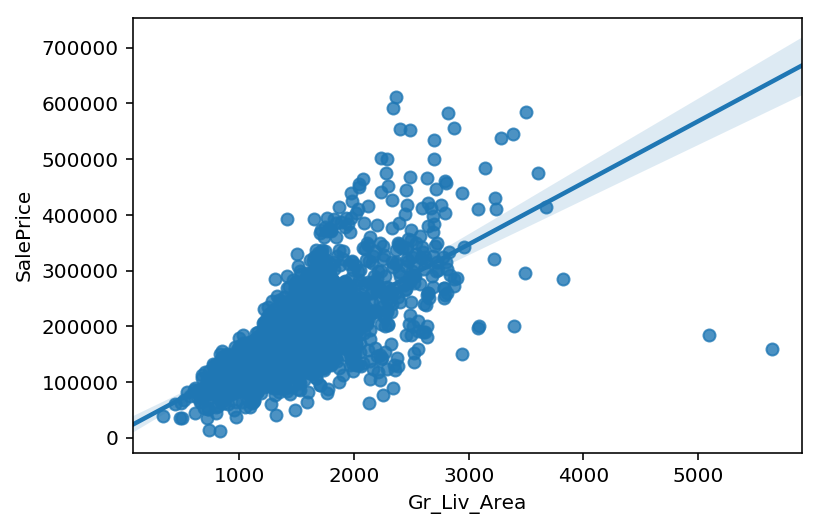

In [17]:
#The outliers in train data
sns.regplot(train_data.Gr_Liv_Area, train_data.SalePrice);
# We can see 2 Outilers 

In [18]:
# remove the outliers
# get the data that more than 50000
outliers = train_data[train_data.Gr_Liv_Area > 5000]
# remove the outliers
train_data.drop(outliers.index, inplace=True,  axis=0)

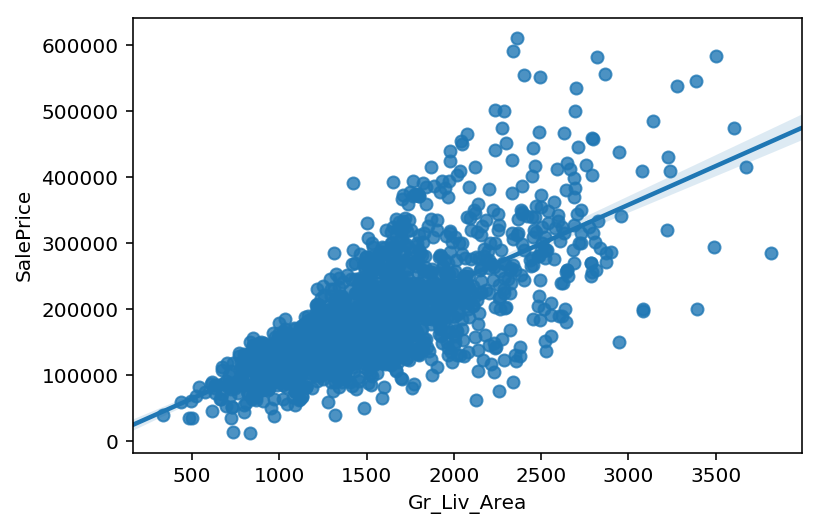

In [19]:
# check the data after remove the outliers
sns.regplot(train_data.Gr_Liv_Area, train_data.SalePrice);

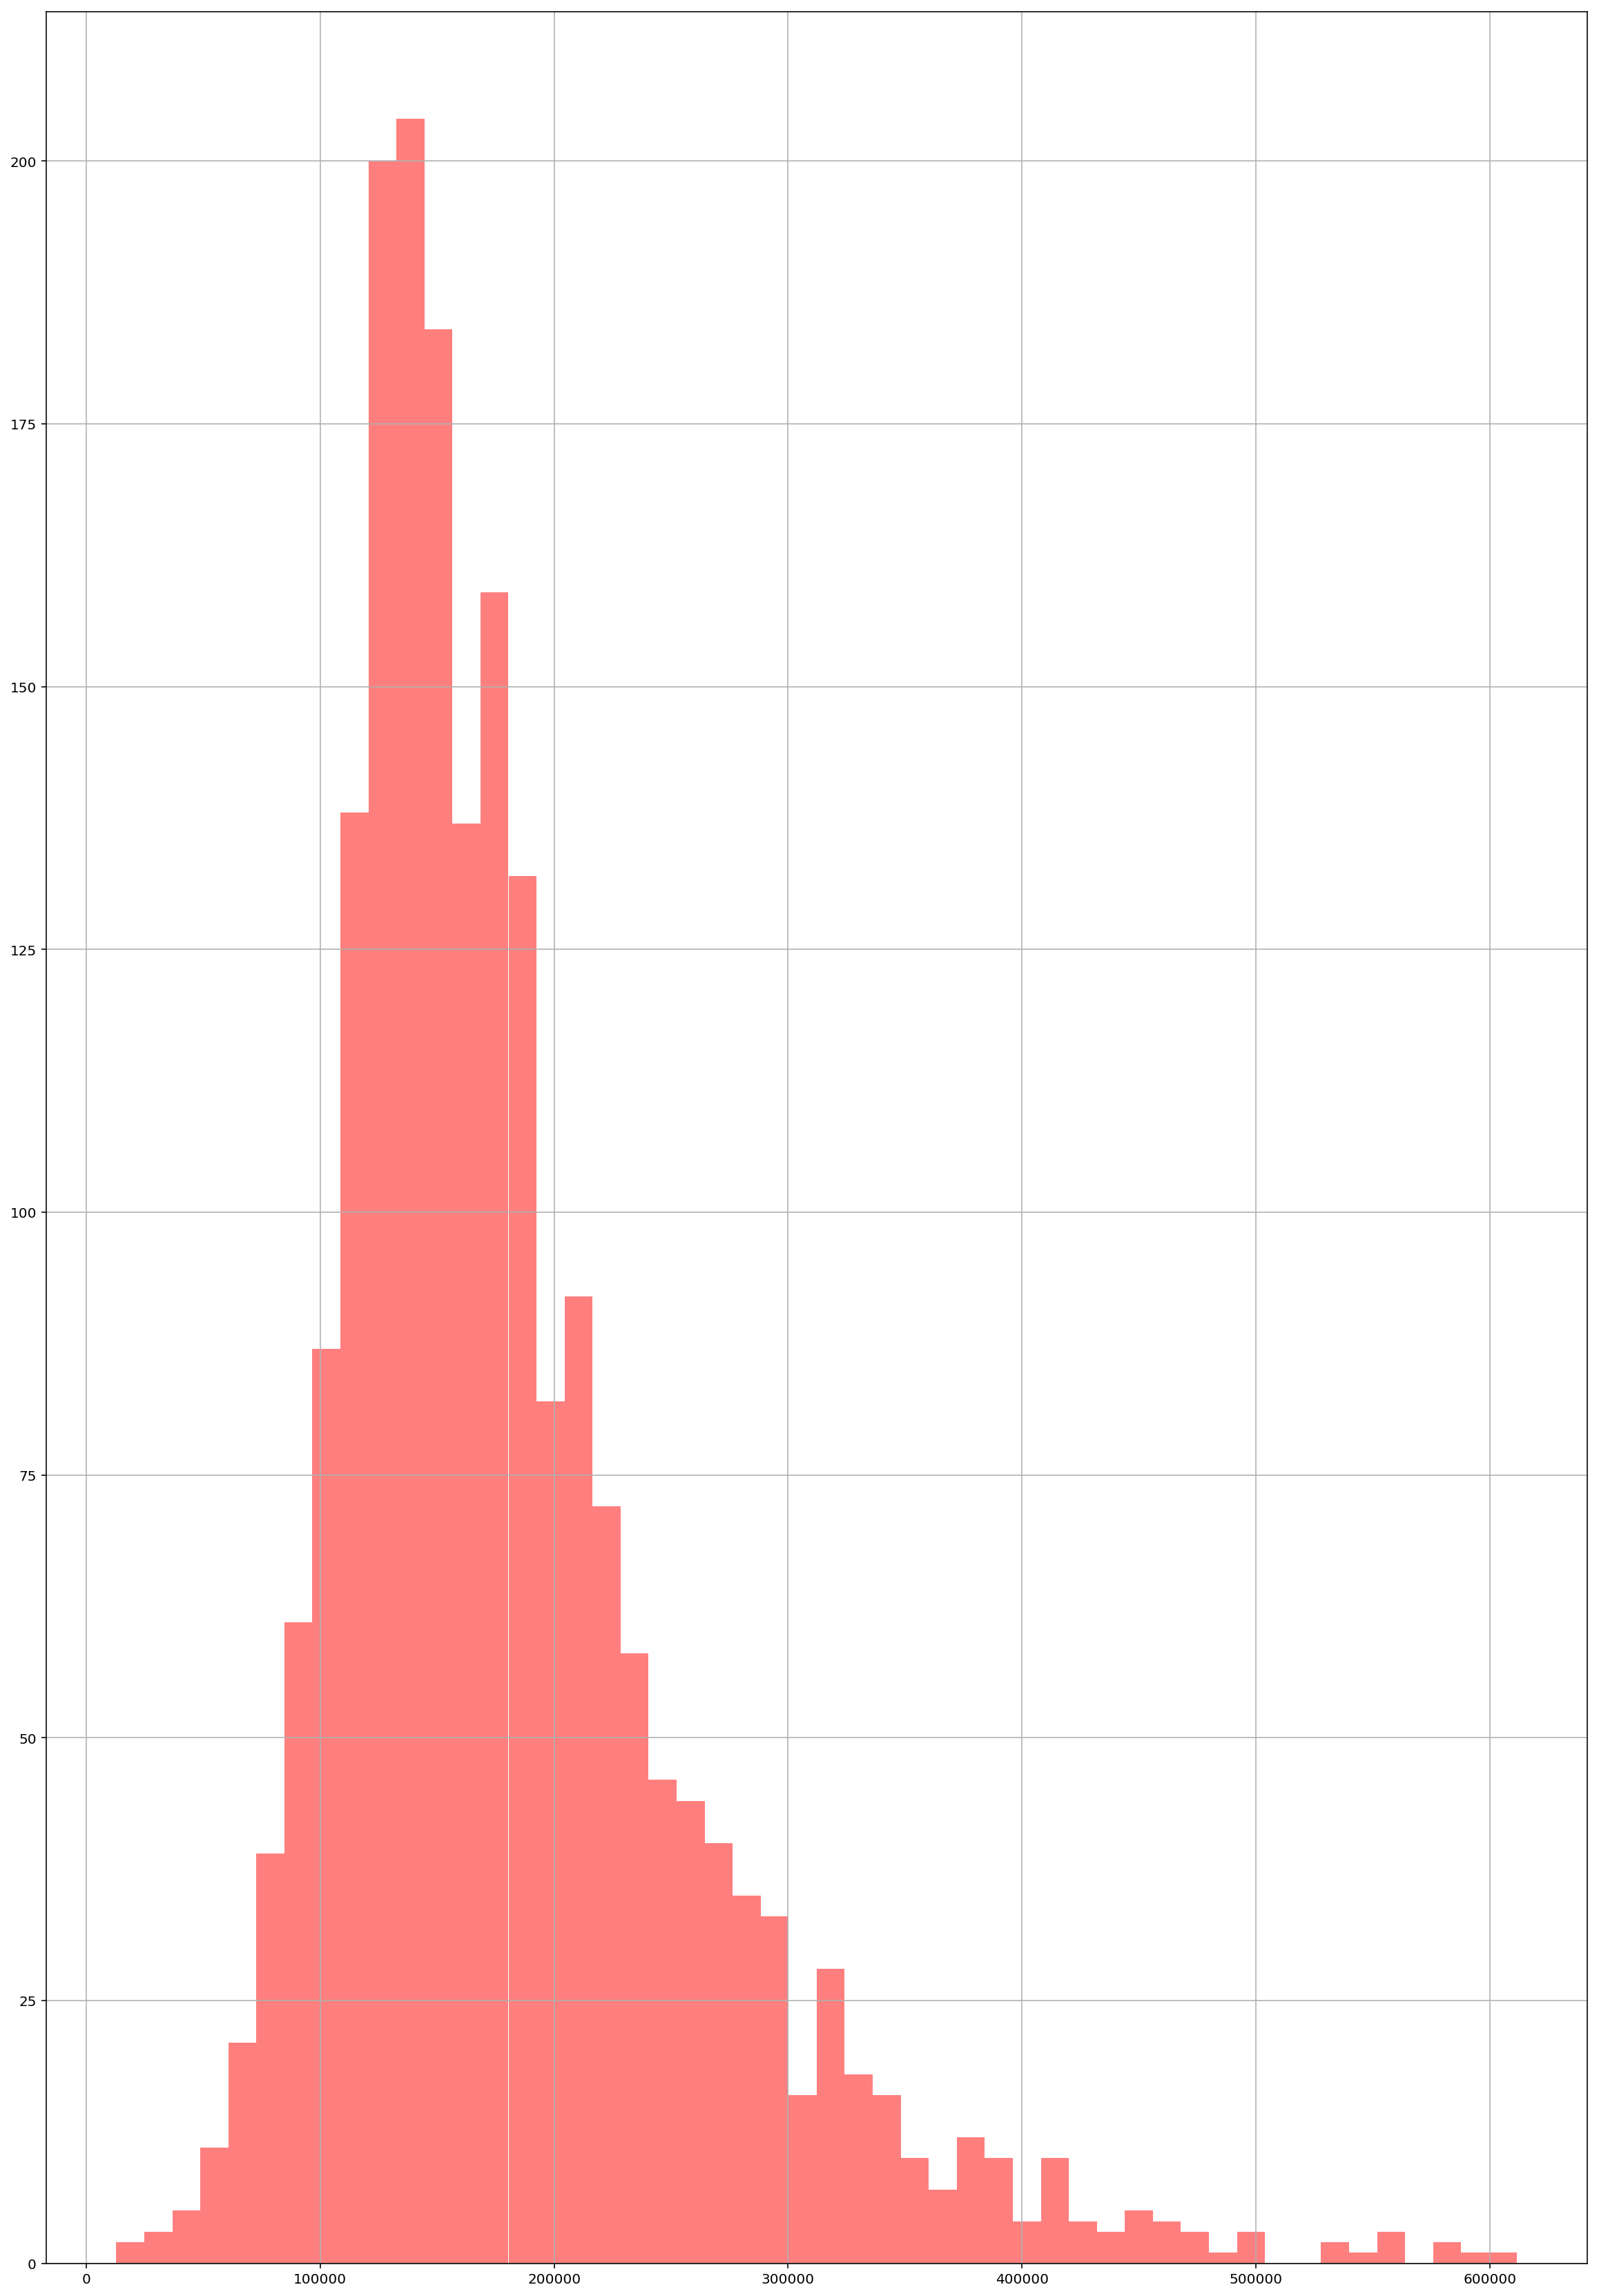

In [20]:
# look at the Sale price distribution
train_data.SalePrice.hist( color="r", alpha=0.5, bins=50,figsize=(20,30));

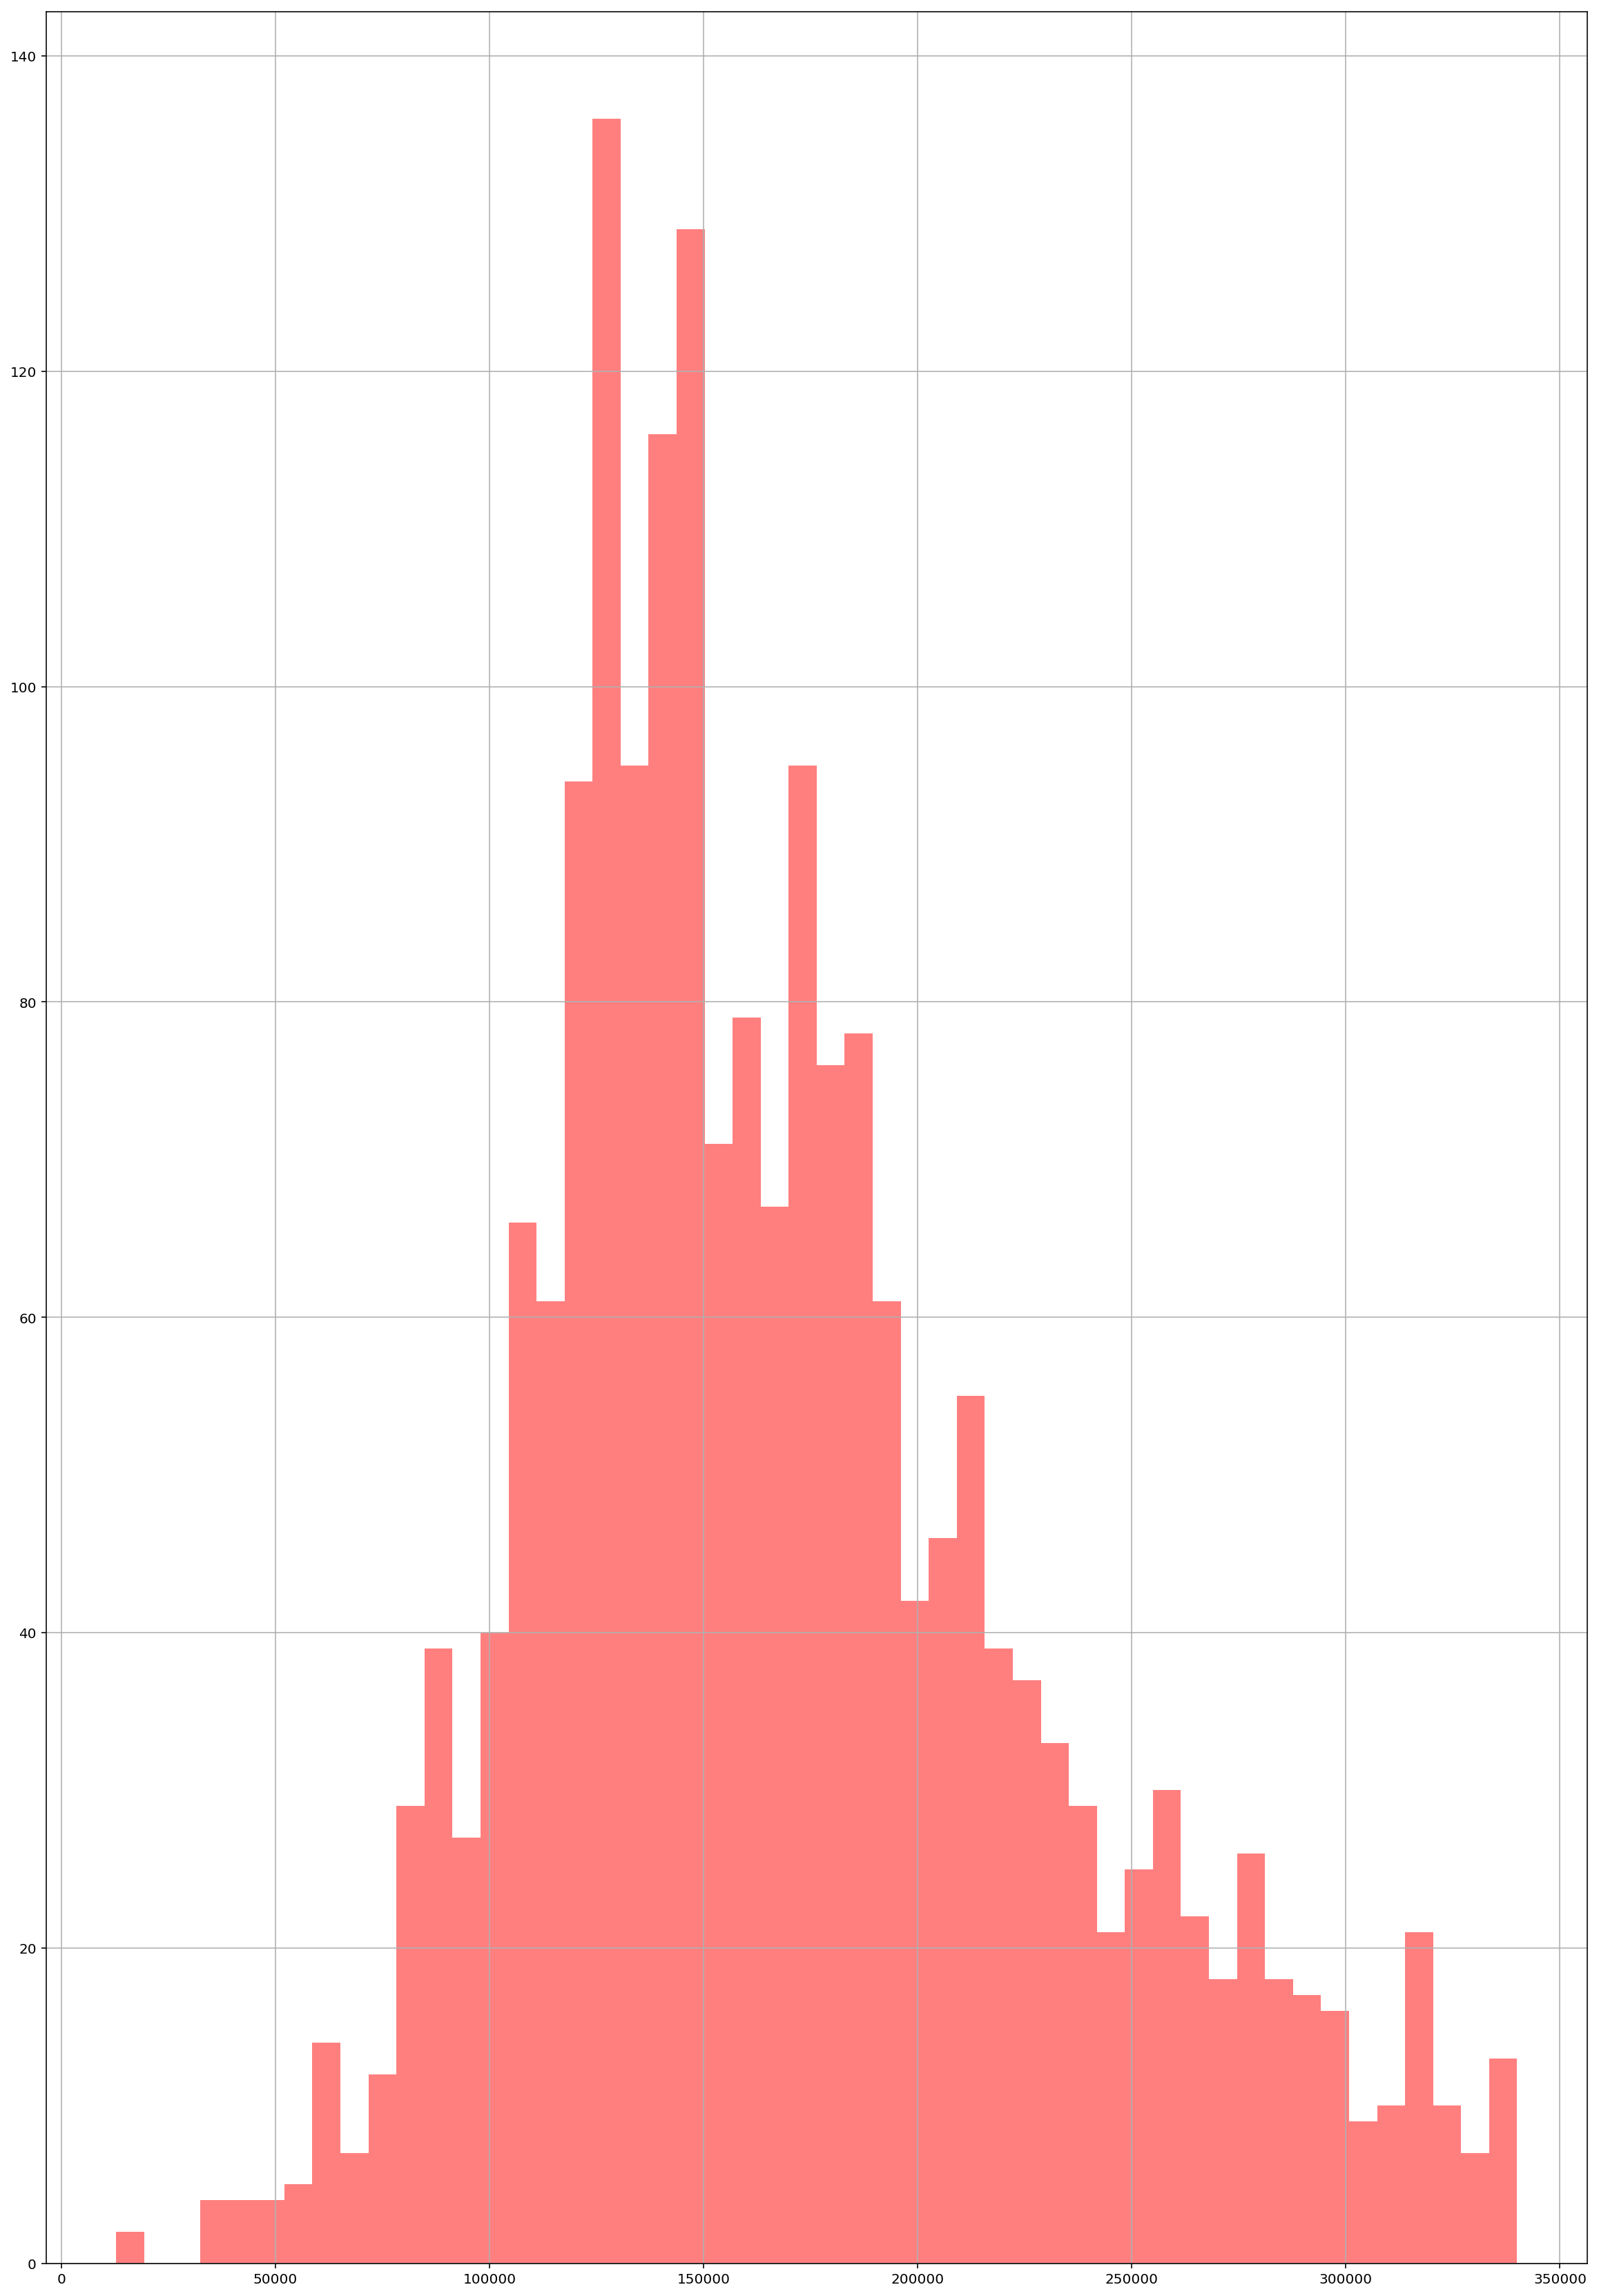

In [21]:
# We can see that the Sales price are not norm distribution 
# We need to remove the Sales outliers that are more than 2 std from the mean
train_data = train_data[(train_data.SalePrice-train_data.SalePrice.mean()) < (2*train_data.SalePrice.std())]

# check the Sales histgram 
train_data.SalePrice.hist( color="r", alpha=0.5, bins=50,figsize=(20,30));


In [22]:
# Encode Sale Condition
EncodedSaleConditionDictionary = {'Abnorml': 1, 'Normal': 0, 'Partial': 0, 'Family' : 0, 'Alloca' : 0, 'AdjLand' : 0}
train_data['Encoded_Sale_Condition'] = train_data.Sale_Condition.map(EncodedSaleConditionDictionary)


In [23]:
# just to make the visualization more clear we split the data depend on categoy we create 
# and concate the columns with SalePrice and Sale_Condition

# the columns that describe the house from outside
outside_house = train_data.loc[:, ['MS_SubClass','MS_Zoning','Lot_Frontage','Street','Alley',
              'Lot_Shape', 'Land_Contour',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2','SalePrice', 'Encoded_Sale_Condition' ]]




# the columns that describe the house from inside 
inside_house = train_data.loc[:, ['SalePrice','Bldg_Type','House_Style'
                           ,'Year_Built', 'Year_Remod/Add','Garage_Yr_Blt', 'Encoded_Sale_Condition']]



# the columns that describe the house from inside (deep)
more_side_house = train_data.loc[:, ['Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Foundation', 'Functional', 'Garage_Type', 'Garage_Finish', 'Garage_Cars',
         'Garage_Finish','Paved_Drive','Misc_Feature', 'Misc_Val','SalePrice' ,'Encoded_Sale_Condition']]


# the columns that describe the house system 
system_house = train_data.loc[:, ['Heating','Central_Air',
                                  'Electrical' ,'SalePrice', 'Encoded_Sale_Condition']]


# the columns that describe the house area 
area_inside_house = train_data.loc[:, ['Low_Qual_Fin_SF','Gr_Liv_Area'
       'Garage_Cars', '1st_Flr_SF', '2nd_Flr_SF', 'Wood_Deck_SF' ,'Open_Porch_SF',
       'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Lot_Area',
       'Mas_Vnr_Area','SalePrice', 'Encoded_Sale_Condition']]


# the columns that count house rooms 
count_house = train_data.loc[:, ['Bsmt_Full_Bath','Bsmt_Half_Bath', 'Full_Bath',
                          'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 
                          'TotRms_AbvGrd','Fireplace_Qu','SalePrice', 'Encoded_Sale_Condition']]


# the columns that rate the house
rate_house = train_data.loc[:, ['Kitchen_Qual','Fireplace_Qu', 'Garage_Qual',
                         'Pool_QC', 'Fence','Overall_Cond', 'Overall_Qual','Exter_Qual',
                         'Bsmt_Qual','BsmtFin_Type_1','BsmtFin_Type_2',
                         'Heating_QC','SalePrice', 'Encoded_Sale_Condition']]

# the columns that describe after the sales
after_sale_house = train_data.loc[:, ['Misc_Val', 'Mo_Sold', 'Yr_Sold', 'Sale_Type',
       'Sale_Condition', 'Misc_Val','Garage_Cars','SalePrice', 'Encoded_Sale_Condition']]

/Users/jasmine/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


## Look at the correlation between each category

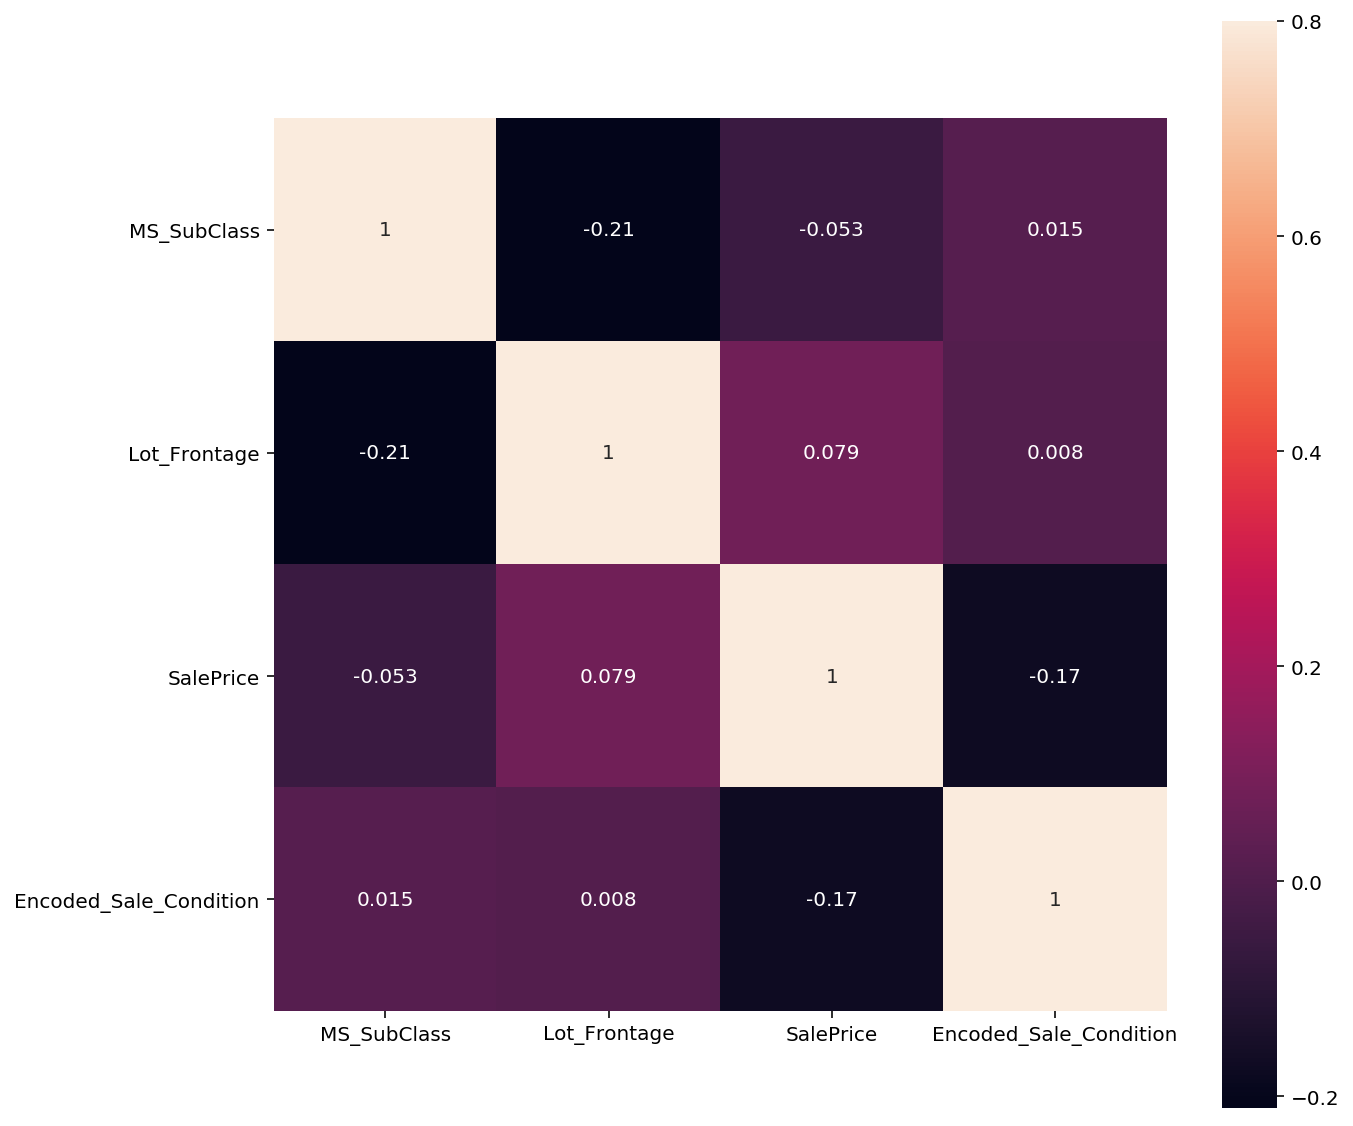

In [24]:

# the corr between the columns that describe the house from outside
corr_outside_house = outside_house.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_outside_house, vmax=.8, square=True, annot=True);

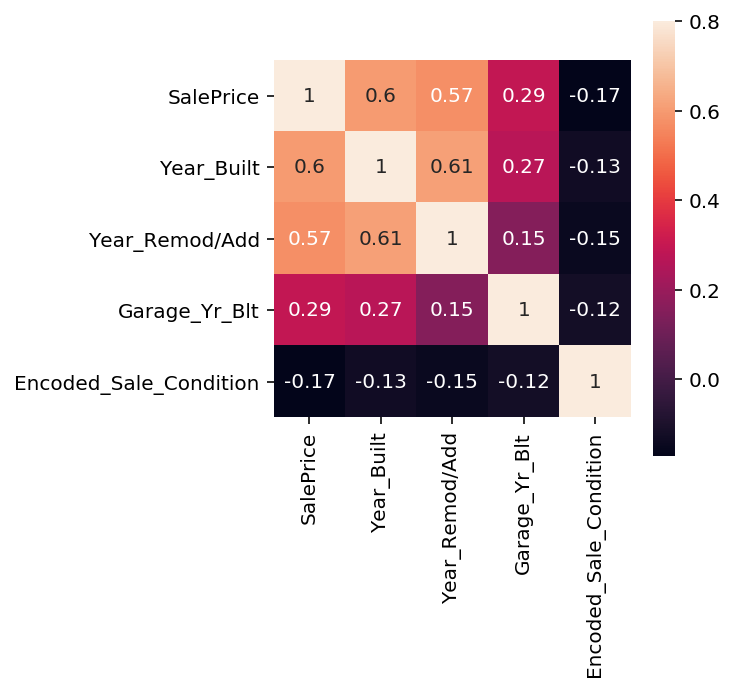

In [25]:
# the corr between the columns that describe the house from inside
corr_inside_house = inside_house.corr()
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corr_inside_house, vmax=.8, square=True, annot=True);

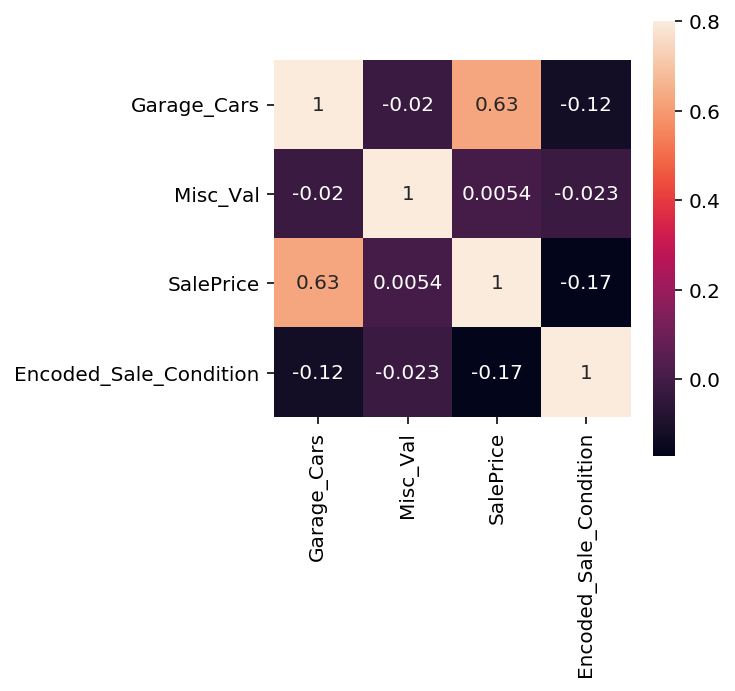

In [26]:
# the corr between columns that describe the house from inside (deep)
corr_more_side_house = more_side_house.corr()
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corr_more_side_house, vmax=.8, square=True, annot=True);

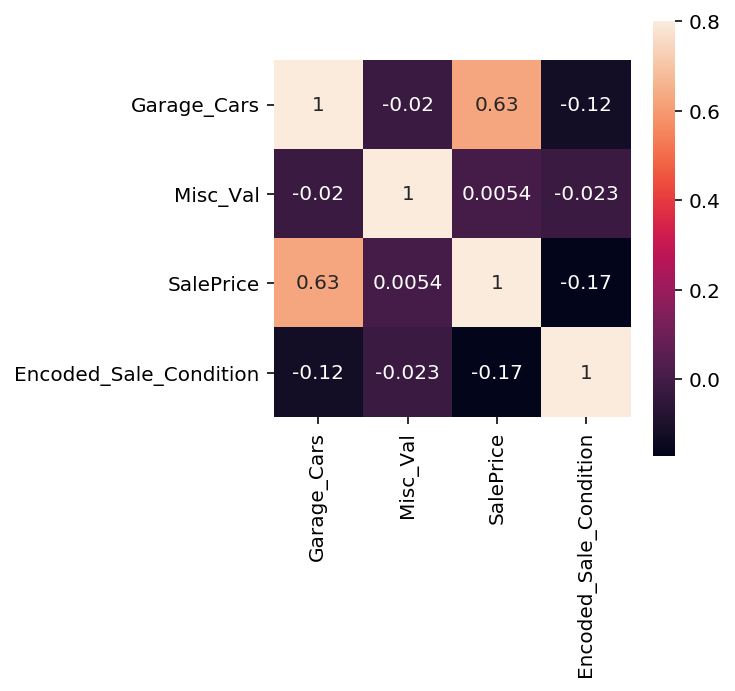

In [27]:
# the corr between the columns that describe the house system 
corr_more_side_house = more_side_house.corr()
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corr_more_side_house, vmax=.8, square=True, annot=True);

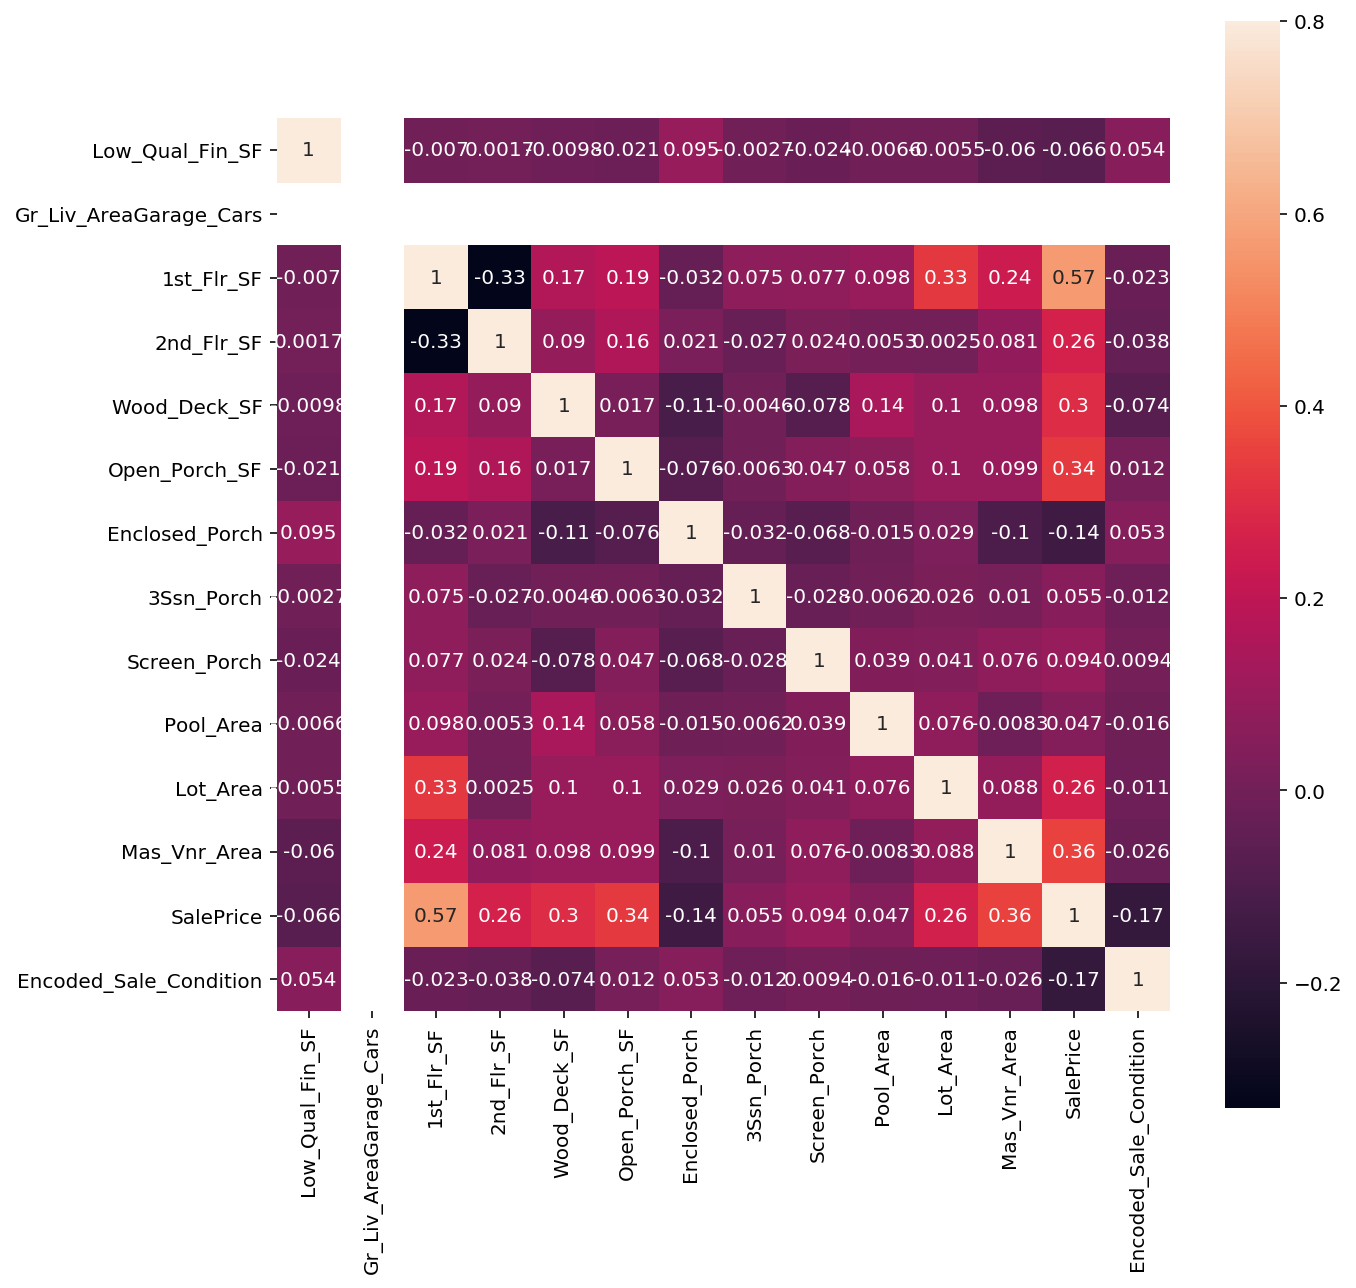

In [28]:
# the corr between the columns that describe the house area inside 
corr_area_inside_house = area_inside_house.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_area_inside_house, vmax=.8, square=True, annot=True);

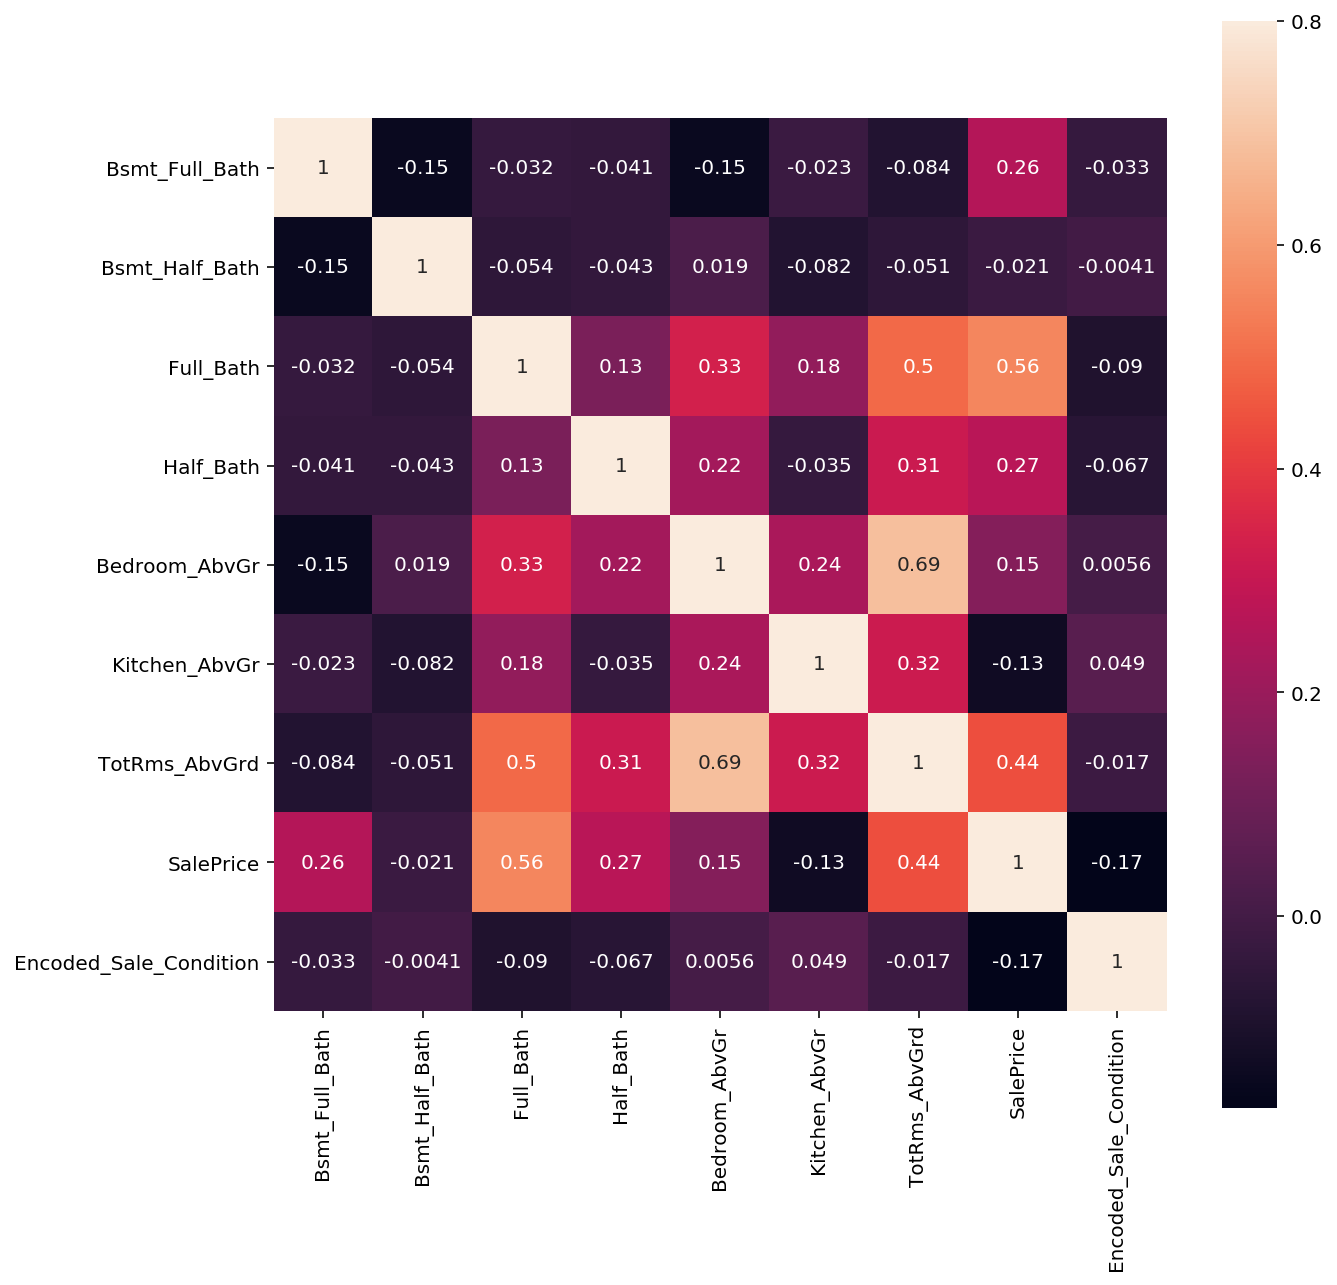

In [29]:

# the corr between the columns that count house rooms 
corr_count_house = count_house.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_count_house, vmax=.8, square=True, annot=True);

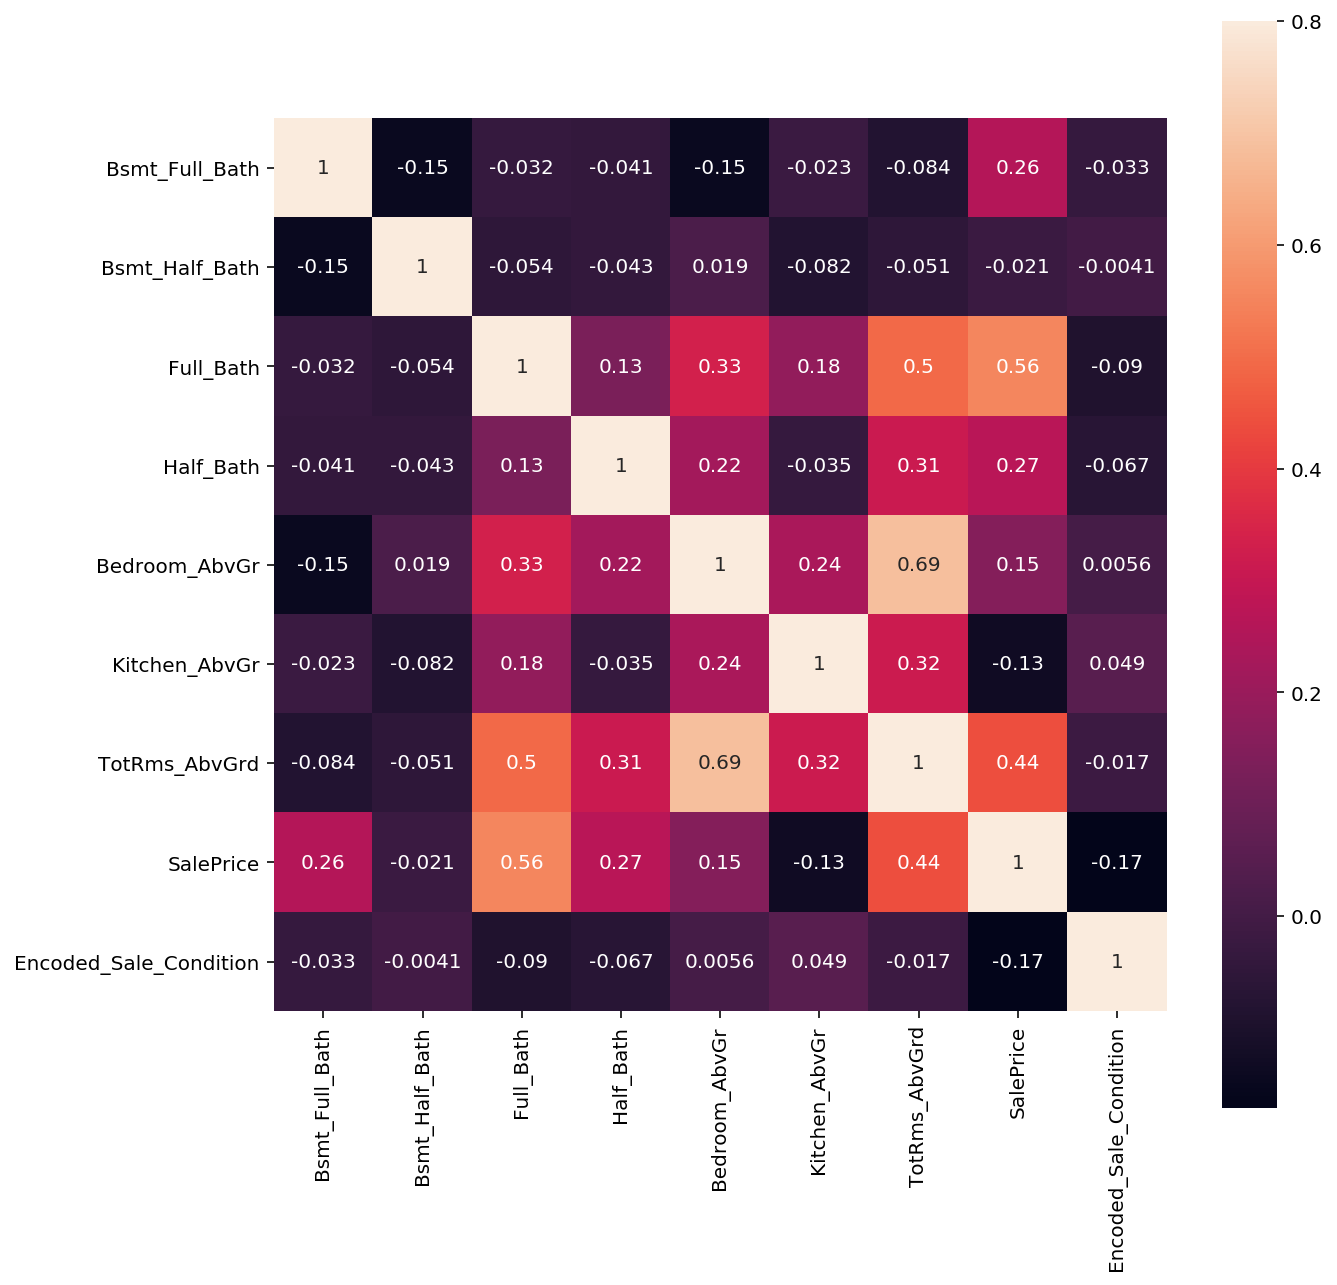

In [30]:
# the corr the columns that rate the house
corr_rate_house  = count_house.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_rate_house, vmax=.8, square=True, annot=True);

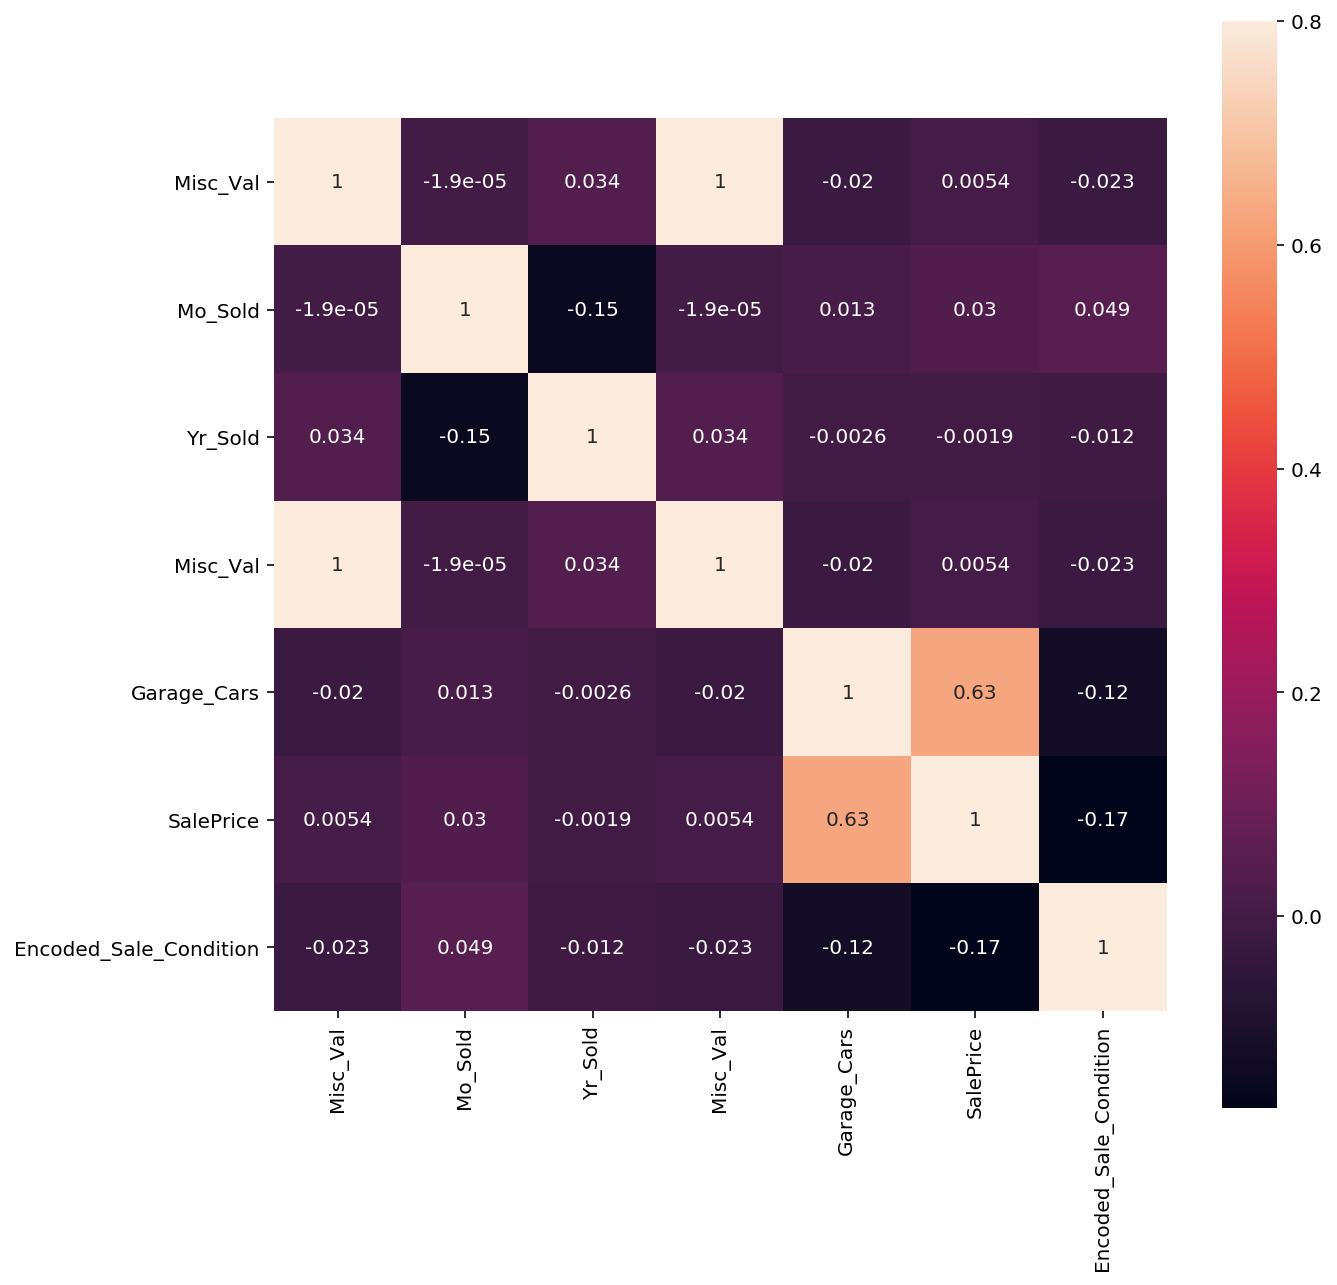

In [31]:
# the corr between the columns that describe after the sales
corr_after_sale_house = after_sale_house.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_after_sale_house, vmax=.8, square=True, annot=True);

from the above heatmaps we show only the correlation between the Sale price and the Sale condition and numeric values 

In [32]:
# dummies 

# pop the sales condition 
sale_condeition = train_data.pop('Sale_Condition')

# join the test and the train data
data = pd.concat([train_data, test_data], sort=False)


# create dummies
data_dummies =pd.get_dummies(data, drop_first=True)

# slpit the train and test data 
train_data_dummies = data_dummies[: len(train_data)]
test_data_dummies = data_dummies[len(train_data): ]


# check train and data shape
print('train_data_dummies', train_data_dummies.shape)
print('test_data_dummies', test_data_dummies.shape)

train_data_dummies (1955, 274)
test_data_dummies (879, 274)


In [33]:
# look at the corr between the Sales price and the train with dummmies
corr_house_dummy = np.abs(train_data_dummies.corr()['SalePrice']).sort_values(ascending=False)[:11]
corr_house_dummy

SalePrice         1.000000
Overall_Qual      0.789607
Gr_Liv_Area       0.677607
Garage_Cars       0.625561
Garage_Area       0.614645
Exter_Qual_TA     0.603172
Year_Built        0.600859
Total_Bsmt_SF     0.589500
Exter_Qual_Gd     0.582074
Year_Remod/Add    0.573351
1st_Flr_SF        0.566815
Name: SalePrice, dtype: float64

In [34]:
# look at the corr between the Sales condition and the train with dummmies
corr_house_dummy = np.abs(train_data_dummies.corr()['Encoded_Sale_Condition']).sort_values(ascending=False)[:11]
corr_house_dummy

Encoded_Sale_Condition    1.000000
SalePrice                 0.172002
MS_Zoning_C (all)         0.161906
Year_Remod/Add            0.145635
Overall_Qual              0.144368
Central_Air_Y             0.139869
Year_Built                0.129551
Sale_Type_WD              0.128236
Neighborhood_IDOTRR       0.126970
Foundation_PConc          0.126945
Garage_Cond_TA            0.125680
Name: Encoded_Sale_Condition, dtype: float64

# Preprocessing
-----

In [35]:
# split the train data to X, y 
y_clf = train_data_dummies.pop('Encoded_Sale_Condition')
y_reg =  train_data_dummies.pop('SalePrice')
X = train_data_dummies.copy(deep=True)

# drop the SalePrice and Sale Condition from test 
test_data_dummies.drop('Encoded_Sale_Condition', axis=1, inplace=True)
test_data_dummies.drop('SalePrice', axis=1, inplace=True)


/Users/jasmine/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
# check test shape
test_data_dummies.shape

(879, 272)

In [37]:
# import 
from sklearn.preprocessing import StandardScaler


#init the Scale
ss = StandardScaler()

#get only the numeric values
X_num = X.iloc[:, :38]

# Scale X for 
X_num_scaled = ss.fit_transform(X_num)

# return the scaled data in the same data set
X.iloc[:, :38] = X_num_scaled

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
#import
from sklearn.model_selection import train_test_split, GridSearchCV

#Split the data to X, y train and X, y validate
X_train_reg , X_validate_reg, y_train_reg, y_validate_reg = train_test_split(X, y_reg, random_state=42)


# Modeling
------

## Regression 

In [39]:
#import
from sklearn import metrics
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso, LassoCV, LogisticRegression, LogisticRegressionCV

In [43]:

#Function to fit the model and calucate the socre 
def FitAndSocre(model, X_train, y_train, X_val , y_val, test_data_dummies):
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred = model.predict(test_data_dummies)
    mse_val = metrics.mean_squared_error(y_val, y_pred_val)
    mse_test = metrics.mean_squared_error(y_train[:879], y_pred)
    print( " The socre on the training data: " , model.score(X_train, y_train),
          "\n The socre on the validation data : " , model.score(X_val, y_val),
            "\n The the mse for y pred on validate data : " , mse_val,
            "\n The sqrt mse for the y pred on validate data : " , np.sqrt(mse_val) ,
            "\n The the mse for y pred on test data : " , mse_test,
            "\n The sqrt mse for the y pred on test data : " ,  np.sqrt(mse_test) )

## Linear Regression

In [535]:
# init the model
lr = LinearRegression()
# call Fit and socre funtion
lr_repot = FitAndSocre(lr, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_dummies)
lr_repot

 The socre on the training data:  0.9398058573936111 
 The socre on the validation data :  -1.268123505661101e+18 
 The the mse for y pred on validate data :  4.6963363110606656e+27 
 The sqrt mse for the y pred on validate data :  68529820597026.7 
 The the mse for y pred on test data :  1.1136137610887306e+37 
 The sqrt mse for the y pred on test data :  3.3370851968278103e+18


## Ridge and RidgeCV model

In [536]:
# init the model
ridge = Ridge()

# call Fit and socre funtion
ridge_repot = FitAndSocre(ridge, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_dummies)
ridge_repot

 The socre on the training data:  0.9374369654376306 
 The socre on the validation data :  0.9189658084826449 
 The the mse for y pred on validate data :  300099962.1578676 
 The sqrt mse for the y pred on validate data :  17323.393494285916 
 The the mse for y pred on test data :  6.5484926341252e+24 
 The sqrt mse for the y pred on test data :  2559002273177.029


In [537]:
# init the model
rcv = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5);
# call Fit and socre funtion
rcv_repot = FitAndSocre(rcv, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_dummies)
rcv_repot

 The socre on the training data:  0.9241414926539089 
 The socre on the validation data :  0.9190654971944107 
 The the mse for y pred on validate data :  299730777.52026844 
 The sqrt mse for the y pred on validate data :  17312.73454773302 
 The the mse for y pred on test data :  2.416200495578742e+22 
 The sqrt mse for the y pred on test data :  155441323192.3462


# Lasso and LassoCV model

In [538]:
# init the model
lasso = Lasso()
# call Fit and socre funtion
lasso_repot = FitAndSocre(lasso, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_dummies)
lasso_repot

 The socre on the training data:  0.9396634526048445 
 The socre on the validation data :  0.9115173715496527 
 The the mse for y pred on validate data :  327684313.89718837 
 The sqrt mse for the y pred on validate data :  18102.052753684824 
 The the mse for y pred on test data :  9.648615919809539e+24 
 The sqrt mse for the y pred on test data :  3106222129824.192


/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [539]:
# init the model
lasso_CV = LassoCV()
# call Fit and socre funtion
lasso_CV_repot = FitAndSocre(lasso_CV, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_dummies)
lasso_CV_repot

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 The socre on the training data:  0.9234759814801239 
 The socre on the validation data :  0.9180310688557466 
 The the mse for y pred on validate data :  303561653.09853154 
 The sqrt mse for the y pred on validate data :  17423.02077994891 
 The the mse for y pred on test data :  2.2269933683344348e+23 
 The sqrt mse for the y pred on test data :  471910305919.93164


## Logistic Regression and  Logistic RegressionCV model

In [540]:
# init the model
logr = LogisticRegression()
# call Fit and socre funtion
logr_repot = FitAndSocre(logr, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_dummies)
logr_repot

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 The socre on the training data:  0.975443383356071 
 The socre on the validation data :  0.02044989775051125 
 The the mse for y pred on validate data :  1360017058.7055216 
 The sqrt mse for the y pred on validate data :  36878.4091129962 
 The the mse for y pred on test data :  7932578812.737202 
 The sqrt mse for the y pred on test data :  89065.02575499096


In [44]:
# init the model
logr_cv = LogisticRegressionCV()
# call Fit and socre funtion
logr_cv_repot = FitAndSocre(logr_cv, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_dummies)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the nu

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the nu

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the nu

 The socre on the training data:  0.02455661664392906 
 The socre on the validation data :  0.012269938650306749 
 The the mse for y pred on validate data :  5162929118.635992 
 The sqrt mse for the y pred on validate data :  71853.525443335 
 The the mse for y pred on test data :  5436271012.964733 
 The sqrt mse for the y pred on test data :  73731.07223528445


## Try to Improve the score : Select only the numeric columns 

In [ ]:
#select only the numeric columns
X = X.iloc[:, :38]
test_data_numeric = test_data_dummies.iloc[:, :38]
#Split the data with the new X
X_train_reg , X_validate_reg, y_train_reg, y_validate_reg = train_test_split(X, y_reg, random_state=42)

In [ ]:
# apply the same models on new X

print('\n - Linear Regression')
lr_repot = FitAndSocre(lr, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_numeric)

print('\n - Ridge Regression')
ridge_repot = FitAndSocre(ridge, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_numeric)

print('\n - RidgeCV Regression')
rcv_repot = FitAndSocre(rcv, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_numeric)

print('\n - Lasso model')
lasso_repot = FitAndSocre(lasso, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_numeric)


print('\n - LassoCV model')
lasso_CV_repot = FitAndSocre(lasso_CV, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_numeric)


print('\n - Logistic Regression  model')
logr_repot = FitAndSocre(logr, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_numeric)


print('\n - Logistic RegressionCV model')
logr_cv_repot = FitAndSocre(logr_cv, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_numeric)




## Try to Improve the score : apply the log on the numeric columns 

In [583]:
# When I apply the log dirct to the data set the columns that contain _SF or _Porch or l_Area
# or _Val transfer to -inf, so I use clip_lower to make it 0.0


# apply the log on the numeric columns for train and test data without scaling
X = train_data_dummies.copy(deep=True).iloc[:, :38].apply(np.log).clip_lower(0)
y = np.log(y_reg.copy(deep=True))
test_data_log = test_data_dummies.copy(deep=True).iloc[:, :38].apply(np.log).clip_lower(0)


In [584]:
#Split the data with the new X
X_train_reg , X_validate_reg, y_train_reg, y_validate_reg = train_test_split(X, y, random_state=42)


In [587]:
# apply the same models on new X

print('\n - Linear Regression')
lr_repot = FitAndSocre(lr, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_log)

print('\n - Ridge Regression')
ridge_repot = FitAndSocre(ridge, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_log)

print('\n - RidgeCV Regression')
rcv_repot = FitAndSocre(rcv, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_log)

print('\n - Lasso model')
lasso_repot = FitAndSocre(lasso, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_log)


print('\n - LassoCV model')
lasso_CV_repot = FitAndSocre(lasso_CV, X_train_reg, y_train_reg, X_validate_reg , y_validate_reg, test_data_log)




 - Linear Regression
 The socre on the training data:  0.8864159967755015 
 The socre on the validation data :  0.8684830716006917 
 The the mse for y pred on validate data :  0.018551364651542158 
 The sqrt mse for the y pred on validate data :  0.1362033944200443 
 The the mse for y pred on test data :  0.2724646454138777 
 The sqrt mse for the y pred on test data :  0.5219814607951874

 - Ridge Regression
 The socre on the training data:  0.865180295646767 
 The socre on the validation data :  0.8395053712853018 
 The the mse for y pred on validate data :  0.022638868000781985 
 The sqrt mse for the y pred on validate data :  0.1504621812974343 
 The the mse for y pred on test data :  0.26937556320157136 
 The sqrt mse for the y pred on test data :  0.519014029869686

 - RidgeCV Regression
 The socre on the training data:  0.8863108333170233 
 The socre on the validation data :  0.8677903050965337 
 The the mse for y pred on validate data :  0.018649084117723664 
 The sqrt mse for 

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


## Classification 

In [57]:
#import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:

#Function to fit the model and calucate the socre ( classification model) 
def FitAndSocreClf(model, X_train, y_train, X_val , y_val, test_data_dummies):
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred = model.predict(test_data_dummies)
    f1_score_val = metrics.f1_score(y_val, y_pred_val)
    f1_score_test = metrics.f1_score(y_train[:879], y_pred)
    print( " The socre on the training data: " , model.score(X_train, y_train),
          "\n The socre on the validation data : " , model.score(X_val, y_val),
            "\n The the f1 score for y pred on validate data : " , f1_score_val,
            "\n The the f1 score for y pred on test data : " , f1_score_test )

## Slove the imbalance data

In [44]:
# make a compy of the train with dummy data and concat the y and X 
data = train_data_dummies.copy(deep=True)
data['Encoded_Sale_Condition'] = train_data['Encoded_Sale_Condition']


In [45]:
# spearte the data based on the sale condition encode
df_class_0 = data[data['Encoded_Sale_Condition'] == 0]
df_class_1 = data[data['Encoded_Sale_Condition'] == 1]

Random under-sampling:
0    130
Name: Encoded_Sale_Condition, dtype: int64


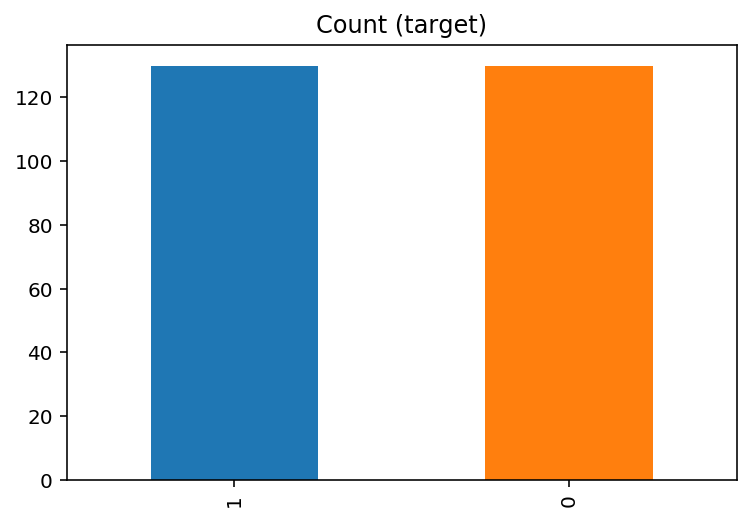

In [47]:
# Under-sample technique 

# count the number of data for 1, 0
count_class_0, count_class_1 = data.Encoded_Sale_Condition.value_counts()

# get a sample for the 0 classe
df_class_0_under = df_class_0.sample(count_class_1)

# get some info

print('Random under-sampling:')
print(df_class_0_under.Encoded_Sale_Condition.value_counts())

# concat the two dataset 
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

#graph
df_test_under.Encoded_Sale_Condition.value_counts().plot(kind='bar', title='Count (target)');

## Modeling for under-sampling technique 

In [40]:
# init new X, y
y_clf = df_test_under.pop('Encoded_Sale_Condition')
X = df_test_under

# spilt the data 
X_train_clf , X_validate_clf, y_train_clf, y_validate_clf = train_test_split(X, y_clf, random_state=42)


NameError: name 'df_test_under' is not defined

## KNeighborsClassifier and  KNeighborsClassifier CV model

In [105]:
# init the model 
knn = KNeighborsClassifier()
# call Fit and socre funtion
knn_report = FitAndSocreClf(knn, X_train_clf, y_train_clf, X_validate_clf, y_validate_clf, test_data_dummies[:195])


 The socre on the training data:  0.7025641025641025 
 The socre on the validation data :  0.5384615384615384 
 The the f1 score for y pred on validate data :  0.5 
 The the f1 score for y pred on test data :  0.4756756756756757


In [107]:
#params for gride search
params = {
    'n_neighbors': range(5,30),
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

#init the gs
gs = GridSearchCV(knn, params)

# call Fit and socre funtion
knn_gs_report = FitAndSocreClf(gs, X_train_clf, y_train_clf, X_validate_clf, y_validate_clf, test_data_dummies[:195])


/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 The socre on the training data:  0.6153846153846154 
 The socre on the validation data :  0.5692307692307692 
 The the f1 score for y pred on validate data :  0.6216216216216217 
 The the f1 score for y pred on test data :  0.5174129353233832


/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Decision Tree Classifier

In [108]:
#import 
from sklearn.tree import DecisionTreeClassifier

In [109]:
# init the model 
clf = DecisionTreeClassifier()
# call Fit and socre funtion
clf_report = FitAndSocreClf(clf, X_train_clf, y_train_clf, X_validate_clf, y_validate_clf, test_data_dummies[:195])



 The socre on the training data:  1.0 
 The socre on the validation data :  0.676923076923077 
 The the f1 score for y pred on validate data :  0.6865671641791045 
 The the f1 score for y pred on test data :  0.4864864864864865


## Bagging Classifier CV

In [110]:
#import 
from sklearn.ensemble import BaggingClassifier

In [111]:
#Bagging
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

bclf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5), param_grid)

In [112]:

# call Fit and socre funtion
bclf_report = FitAndSocreClf(bclf, X_train_clf, y_train_clf, X_validate_clf, y_validate_clf, test_data_dummies[:195])


/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


 The socre on the training data:  0.9179487179487179 
 The socre on the validation data :  0.6153846153846154 
 The the f1 score for y pred on validate data :  0.626865671641791 
 The the f1 score for y pred on test data :  0.5125628140703518


## Modeling for over-sampling technique 

Random over-sampling:
1    1825
0    1825
Name: Encoded_Sale_Condition, dtype: int64


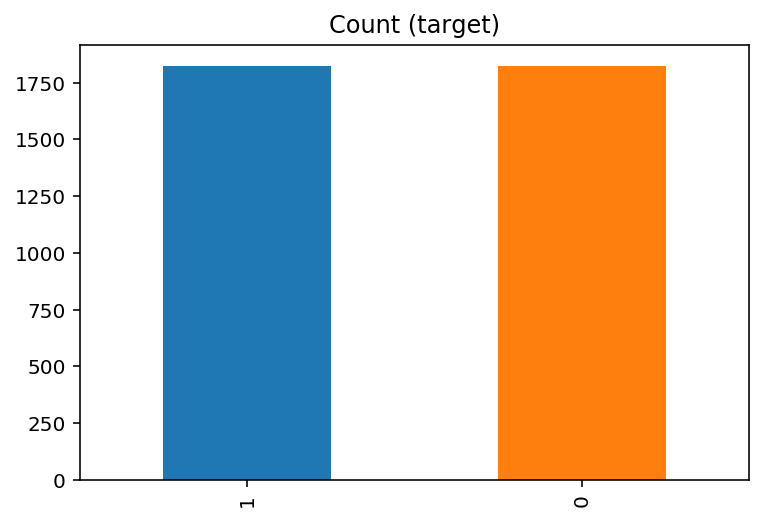

In [162]:
# re-init the data

# make a compy of the train with dummy data and concat the y and X 
data = train_data_dummies.copy(deep=True)
data['Encoded_Sale_Condition'] = train_data['Encoded_Sale_Condition']

# get a over sample of 1's
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Encoded_Sale_Condition.value_counts())

df_test_over.Encoded_Sale_Condition.value_counts().plot(kind='bar', title='Count (target)');

In [163]:
# init new X, y
y_clf = df_test_over.pop('Encoded_Sale_Condition')
X = df_test_over


# split the over sample data 
X_train_clf , X_validate_clf, y_train_clf, y_validate_clf = train_test_split(X, y_clf, random_state=42)

## KNeighborsClassifier and  KNeighborsClassifier CV model

In [160]:

# call Fit and socre funtion for Knn
knn_report = FitAndSocreClf(knn, X_train_clf, y_train_clf, X_validate_clf, y_validate_clf, test_data_dummies)

print('\n')
# call Fit and socre funtion for Knn Cv
knn_gs_report = FitAndSocreClf(gs, X_train_clf, y_train_clf, X_validate_clf, y_validate_clf, test_data_dummies)

print('\n')
# call Fit and socre funtion for Decision Tree Classifier
clf_report = FitAndSocreClf(clf, X_train_clf, y_train_clf, X_validate_clf, y_validate_clf, test_data_dummies)

print('\n')
# call Fit and socre funtion for BaggingClassifier
bclf_report = FitAndSocreClf(bclf, X_train_clf, y_train_clf, X_validate_clf, y_validate_clf, test_data_dummies)



 The socre on the training data:  0.9265619291194739 
 The socre on the validation data :  0.8806133625410734 
 The the f1 score for y pred on validate data :  0.8879753340184996 
 The the f1 score for y pred on test data :  0.32665639445300465




/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 The socre on the training data:  1.0 
 The socre on the validation data :  0.8893756845564075 
 The the f1 score for y pred on validate data :  0.8953367875647669 
 The the f1 score for y pred on test data :  0.294770206022187


 The socre on the training data:  1.0 
 The socre on the validation data :  0.9583789704271632 
 The the f1 score for y pred on validate data :  0.9578713968957872 
 The the f1 score for y pred on test data :  0.17045454545454547




/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 The socre on the training data:  0.8998903909389843 
 The socre on the validation data :  0.8652792990142387 
 The the f1 score for y pred on validate data :  0.8692879914984059 
 The the f1 score for y pred on test data :  0.3227848101265823


##  Trying PCA 

In [161]:
#impot
from sklearn.decomposition import PCA

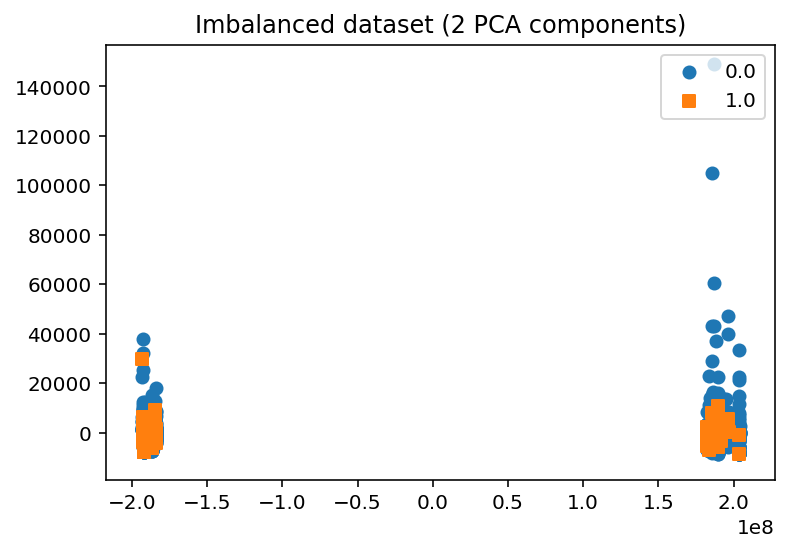

In [204]:
# function to plot the 2 components PCA
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
    



pca = PCA(n_components=2)
X = pca.fit_transform(train_data_dummies)

plot_2d_space(X, y_clf, 'Imbalanced dataset (2 PCA components)')

In [205]:
# We can see from above that the data (0, 1) are overlaped, so we can't split them